In [242]:
import tweepy
import pandas as pd
import numpy as np
import requests
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
import os





- Data Wrangling¶


In [243]:
consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ' '

In [244]:
folder_name = 'Image_Predictions'
if not os.path.exists(folder_name):
 os.makedirs(folder_name)

_ Twitter archive csv file

In [119]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


- - tweet image predictions tsv file 


In [237]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

In [238]:
# Download the image prediction file using the link provided to Udacity students
open('image_predictions.tsv', 'wb').write(response.content)

335079

- Twitter API & JSON


In [120]:
auth = tweepy.OAuthHandler(' ', ' ')
auth.set_access_token('  ', '')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [6]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in df1['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

In [ ]:
#Printing 
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))

In [ ]:
#Then in this code block we isolate the json part of each tweepy 
#status object that we have downloaded and we add them all into a list
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [ ]:
#we write this list into a txt file:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [121]:

#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [122]:
tweet_json


,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34519,7184,9041164,20,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,29931,5394,9041164,20,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22519,3560,9041164,20,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,37763,7410,9041164,20,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36049,7944,9041164,20,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...,...,...,...
2323,666049248165822465,92,37,9041240,20,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2324,666044226329800704,252,118,9041240,20,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2325,666033412701032449,102,37,9041240,20,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2326,666029285002620928,116,40,9041240,20,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI


In [125]:
# Showing the data in the image predictions file
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [241]:
os.listdir(folder_name)

[]

- Gathering Summary

--After gathering the required pieces of data, we are going to assess them visually and programmatically for quality and tidiness issues.


- Visual Assessment

In [127]:
df1


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [128]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


- Programmatic Assessment


In [129]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2328 non-null   object
 1   favorite_count    2328 non-null   int64 
 2   retweet_count     2328 non-null   int64 
 3   followers_count   2328 non-null   int64 
 4   friends_count     2328 non-null   int64 
 5   source            2328 non-null   object
 6   retweeted_status  2328 non-null   object
 7   url               2328 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.6+ KB


In [130]:
tweet_json.describe()

,favorite_count,retweet_count,followers_count,friends_count
count,2328.000000,2328.000000,2.328000e+03,2328.0
mean,7207.848797,2534.991409,9.041200e+06,20.0
std,11196.845007,4292.213460,4.346501e+01,0.0
min,0.000000,1.000000,9.041164e+06,20.0
25%,1250.500000,512.000000,9.041182e+06,20.0
50%,3120.500000,1179.500000,9.041194e+06,20.0
75%,8799.000000,2931.750000,9.041207e+06,20.0
max,148040.000000,72669.000000,9.041643e+06,20.0


In [131]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [132]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [133]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [134]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [135]:

sum(df1['tweet_id'].duplicated())

0

In [136]:
sum(tweet_json['tweet_id'].duplicated())

0

In [137]:
df1[df1['in_reply_to_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [138]:
tweet_json[tweet_json['friends_count'].isnull()]

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url


In [139]:
df1['retweeted_status_id'].count()


181

In [140]:
df1['rating_numerator'].value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [141]:
df1['rating_denominator'].value_counts()


10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [142]:
df1['name'].value_counts()


None        745
a            55
Charlie      12
Cooper       11
Lucy         11
           ... 
Sundance      1
Edgar         1
Bauer         1
light         1
Ferg          1
Name: name, Length: 957, dtype: int64

In [143]:
df_image_predictions['img_num'].value_counts()


1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [144]:
df_image_predictions['p1'].value_counts()


golden_retriever       150
Labrador_retriever     100
Pembroke                89
Chihuahua               83
pug                     57
                      ... 
standard_schnauzer       1
mud_turtle               1
damselfly                1
black-footed_ferret      1
cheetah                  1
Name: p1, Length: 378, dtype: int64

In [145]:
df_image_predictions['p2'].value_counts()


Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
EntleBucher             1
coffee_mug              1
sock                    1
seashore                1
dugong                  1
Name: p2, Length: 405, dtype: int64

In [146]:
df_image_predictions['p3'].value_counts()


Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
chest                  1
gorilla                1
African_chameleon      1
green_lizard           1
hand-held_computer     1
Name: p3, Length: 408, dtype: int64

In [147]:
tweet_json['favorite_count'].value_counts()

0        161
395        4
286        3
1746       3
866        3
        ... 
1546       1
32263      1
1540       1
3587       1
34815      1
Name: favorite_count, Length: 1969, dtype: int64

In [148]:
tweet_json['retweet_count'].value_counts()

87      5
118     5
80      4
51      4
417     4
       ..
3579    1
1530    1
5624    1
1524    1
6139    1
Name: retweet_count, Length: 1671, dtype: int64

- clean


--This section consists of the cleaning portion of the data wrangling process:

-Define

-Code

-test

In [149]:
# Make a copy of the tables before cleaning
df1_clean = df1.copy()
df_image_predictions_clean = df_image_predictions.copy()
tweet_json_clean = tweet_json.copy()

In [150]:


df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [151]:
df1_clean = df1_clean[df1_clean['in_reply_to_status_id'].isnull()]


In [152]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2278 non-null   object 
 4   source                      2278 non-null   object 
 5   text                        2278 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2274 non-null   object 
 10  rating_numerator            2278 non-null   int64  
 11  rating_denominator          2278 non-null   int64  
 12  name                        2278 non-null   object 
 13  doggo                       2278 

In [153]:
df1_clean = df1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [154]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2278 non-null   int64 
 1   timestamp           2278 non-null   object
 2   source              2278 non-null   object
 3   text                2278 non-null   object
 4   expanded_urls       2274 non-null   object
 5   rating_numerator    2278 non-null   int64 
 6   rating_denominator  2278 non-null   int64 
 7   name                2278 non-null   object
 8   doggo               2278 non-null   object
 9   floofer             2278 non-null   object
 10  pupper              2278 non-null   object
 11  puppo               2278 non-null   object
dtypes: int64(3), object(9)
memory usage: 231.4+ KB


In [155]:

df1_clean = df1_clean.drop(['expanded_urls'], axis = 1)

In [156]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2278 non-null   int64 
 1   timestamp           2278 non-null   object
 2   source              2278 non-null   object
 3   text                2278 non-null   object
 4   rating_numerator    2278 non-null   int64 
 5   rating_denominator  2278 non-null   int64 
 6   name                2278 non-null   object
 7   doggo               2278 non-null   object
 8   floofer             2278 non-null   object
 9   pupper              2278 non-null   object
 10  puppo               2278 non-null   object
dtypes: int64(3), object(8)
memory usage: 213.6+ KB


In [157]:
# Define: use loc to correct the typo mistakes in specified cells

# Code

df1_clean.loc[df1_clean['rating_numerator']==50, ['rating_numerator']] = 10
df1_clean.loc[df1_clean['rating_denominator']==50, ['rating_denominator']] = 10

df1_clean.loc[df1_clean['rating_numerator']==88, ['rating_numerator']] = 11
df1_clean.loc[df1_clean['rating_denominator']==80, ['rating_denominator']] = 10

df1_clean.loc[df1_clean['rating_numerator']==80, ['rating_numerator']] = 10
df1_clean.loc[df1_clean['rating_denominator']==80, ['rating_denominator']] = 10

df1_clean.loc[df1_clean['rating_numerator']==44, ['rating_numerator']] = 11
df1_clean.loc[df1_clean['rating_denominator']==40, ['rating_denominator']] = 10

In [158]:
df1_clean[df1_clean['rating_numerator'] > 20 ]



,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",75,10,Logan,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,165,150,None,None,None,None,None
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,1776,10,Atticus,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,204,170,this,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,99,90,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",45,10,None,None,None,None,None


In [159]:
len(df1_clean[df1_clean['rating_numerator'] > 20 ])


15

In [160]:
df1_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2278 non-null   int64 
 1   timestamp           2278 non-null   object
 2   source              2278 non-null   object
 3   text                2278 non-null   object
 4   rating_numerator    2278 non-null   int64 
 5   rating_denominator  2278 non-null   int64 
 6   name                2278 non-null   object
 7   doggo               2278 non-null   object
 8   floofer             2278 non-null   object
 9   pupper              2278 non-null   object
 10  puppo               2278 non-null   object
dtypes: int64(3), object(8)
memory usage: 213.6+ KB


In [161]:
# Define: exclude all extreme and zero values from the numertor and denuminator

#Code
df1_clean = df1_clean[df1_clean['rating_numerator'] != 0 ]
df1_clean = df1_clean[df1_clean['rating_denominator'] >= 10 ]
df1_clean = df1_clean[df1_clean['rating_numerator'] <= 20 ]
df1_clean = df1_clean[df1_clean['rating_denominator'] < 20 ]

In [162]:
df1_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2260 non-null   int64 
 1   timestamp           2260 non-null   object
 2   source              2260 non-null   object
 3   text                2260 non-null   object
 4   rating_numerator    2260 non-null   int64 
 5   rating_denominator  2260 non-null   int64 
 6   name                2260 non-null   object
 7   doggo               2260 non-null   object
 8   floofer             2260 non-null   object
 9   pupper              2260 non-null   object
 10  puppo               2260 non-null   object
dtypes: int64(3), object(8)
memory usage: 211.9+ KB


In [163]:
df1_clean =  df1_clean.replace('None', np.nan)


In [164]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2260 non-null   int64 
 1   timestamp           2260 non-null   object
 2   source              2260 non-null   object
 3   text                2260 non-null   object
 4   rating_numerator    2260 non-null   int64 
 5   rating_denominator  2260 non-null   int64 
 6   name                1602 non-null   object
 7   doggo               93 non-null     object
 8   floofer             10 non-null     object
 9   pupper              252 non-null    object
 10  puppo               29 non-null     object
dtypes: int64(3), object(8)
memory usage: 211.9+ KB


In [165]:
# Define: use loc to add a new column dog_class = doggo, floofer, pupper or poppo. NaN will be used if not any of the previous

# Code
df1_clean.loc[df1_clean['doggo'] == 'doggo', 'dog_class'] = 'doggo'
df1_clean.loc[df1_clean['floofer'] == 'floofer', 'dog_class'] = 'floofer'
df1_clean.loc[df1_clean['pupper'] == 'pupper', 'dog_class'] = 'pupper'
df1_clean.loc[df1_clean['puppo'] == 'puppo', 'dog_class'] = 'puppo'

df1_clean.sample(5)


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_class
906,758041019896193024,2016-07-26 20:47:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Teagan reads entire books in store so they're ...,9,10,NaN,NaN,NaN,NaN,NaN,NaN
1723,680100725817409536,2015-12-24 19:00:23 +0000,"<a href=""https://about.twitter.com/products/tw...",This pupper is not coming inside until she cat...,11,10,NaN,NaN,NaN,pupper,NaN,pupper
1910,674416750885273600,2015-12-09 02:34:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jonah. He's a Stinted Fisher Price. En...,10,10,Jonah,NaN,NaN,NaN,NaN,NaN
379,827653905312006145,2017-02-03 23:04:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Boots. She doesn't know what to do wit...,12,10,Boots,NaN,NaN,NaN,NaN,NaN
2182,668992363537309700,2015-11-24 03:19:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harrison. He braves the snow like a ch...,8,10,Harrison,NaN,NaN,NaN,NaN,NaN


In [166]:
df1_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2260 non-null   int64 
 1   timestamp           2260 non-null   object
 2   source              2260 non-null   object
 3   text                2260 non-null   object
 4   rating_numerator    2260 non-null   int64 
 5   rating_denominator  2260 non-null   int64 
 6   name                1602 non-null   object
 7   doggo               93 non-null     object
 8   floofer             10 non-null     object
 9   pupper              252 non-null    object
 10  puppo               29 non-null     object
 11  dog_class           371 non-null    object
dtypes: int64(3), object(9)
memory usage: 229.5+ KB


In [167]:
df1_clean.columns


Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_class'],
      dtype='object')

In [168]:

df1_clean = df1_clean.drop(['timestamp', 'source', 'rating_numerator','text','rating_denominator','name','dog_class'], axis = 1)

In [169]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260 entries, 0 to 2355
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2260 non-null   int64 
 1   doggo     93 non-null     object
 2   floofer   10 non-null     object
 3   pupper    252 non-null    object
 4   puppo     29 non-null     object
dtypes: int64(1), object(4)
memory usage: 105.9+ KB


##Cleaning images_prediction


In [170]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [171]:
df_image_predictions_clean= df_image_predictions_clean.rename(columns={'p1':'Breed_probability1', 'p2':'Breed_probability2', 'p3':'Breed_probability3'})


In [172]:
df_image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,Breed_probability1,p1_conf,p1_dog,Breed_probability2,p2_conf,p2_dog,Breed_probability3,p3_conf,p3_dog
788,690400367696297985,https://pbs.twimg.com/media/CZTLeBuWIAAFkeR.jpg,1,Pembroke,0.426459,True,papillon,0.317368,True,Shetland_sheepdog,0.077616,True
1782,828770345708580865,https://pbs.twimg.com/media/C4BiOXOXAAAf6IS.jpg,1,seat_belt,0.765979,False,Chesapeake_Bay_retriever,0.033899,True,polecat,0.027252,False
1371,762316489655476224,https://pbs.twimg.com/media/CpRKzZKWAAABGh7.jpg,1,African_grey,0.270468,False,Madagascar_cat,0.076187,False,television,0.033306,False
767,689275259254616065,https://pbs.twimg.com/media/CZDMMY0WEAAQYjQ.jpg,1,American_Staffordshire_terrier,0.215161,True,Chesapeake_Bay_retriever,0.079051,True,Doberman,0.070226,True
1445,775842724423557120,https://pbs.twimg.com/media/CsRY1jAWYAUOx55.jpg,2,chow,0.520022,True,bath_towel,0.028775,False,French_bulldog,0.025990,True


In [173]:
assert [df_image_predictions_clean[df_image_predictions_clean['p1_conf'] > 0.5 ]]


In [174]:
df_image_predictions_clean = df_image_predictions_clean.filter(['tweet_id','Breed_probability1','p1_conf'] )


In [175]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2075 non-null   int64  
 1   Breed_probability1  2075 non-null   object 
 2   p1_conf             2075 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 48.8+ KB


In [176]:

df_image_predictions_clean = df_image_predictions_clean.groupby('Breed_probability1').filter(lambda x: len(x) > 3)

In [177]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 2073
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1690 non-null   int64  
 1   Breed_probability1  1690 non-null   object 
 2   p1_conf             1690 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 52.8+ KB


In [178]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2328 non-null   object
 1   favorite_count    2328 non-null   int64 
 2   retweet_count     2328 non-null   int64 
 3   followers_count   2328 non-null   int64 
 4   friends_count     2328 non-null   int64 
 5   source            2328 non-null   object
 6   retweeted_status  2328 non-null   object
 7   url               2328 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.6+ KB


In [179]:
tweeter_df.sample(5)


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_class,Breed_probability1,p1_conf
759,773247561583001600,2016-09-06 19:52:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. He's a pupholder. Comes with the...,10.0,10.0,Chip,NaN,seat_belt,0.713588
608,793210959003287553,2016-10-31 22:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maude. She's the h*ckin happiest wasp ...,10.0,10.0,Maude,NaN,doormat,0.874431
669,785639753186217984,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,10.0,10.0,Pinot,pupper,porcupine,0.978042
408,820446719150292993,2017-01-15 01:45:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Peaches. She's the ulti...,13.0,10.0,Peaches,NaN,golden_retriever,0.938048
1036,738883359779196928,2016-06-04 00:01:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When a single soap orb changes your entire per...,10.0,10.0,NaN,NaN,Labrador_retriever,0.691137


In [180]:
tweeter_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2293 non-null   int64  
 1   timestamp           2260 non-null   object 
 2   source              2260 non-null   object 
 3   text                2260 non-null   object 
 4   rating_numerator    2260 non-null   float64
 5   rating_denominator  2260 non-null   float64
 6   name                1602 non-null   object 
 7   dog_class           371 non-null    object 
 8   Breed_probability1  1690 non-null   object 
 9   p1_conf             1690 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 197.1+ KB


In [181]:
# Define: filter/select needed columns
# Code
tweet_json_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2328 non-null   object
 1   favorite_count    2328 non-null   int64 
 2   retweet_count     2328 non-null   int64 
 3   followers_count   2328 non-null   int64 
 4   friends_count     2328 non-null   int64 
 5   source            2328 non-null   object
 6   retweeted_status  2328 non-null   object
 7   url               2328 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.6+ KB


In [216]:
tweeter_df.to_csv('twitter_archive_master.csv')

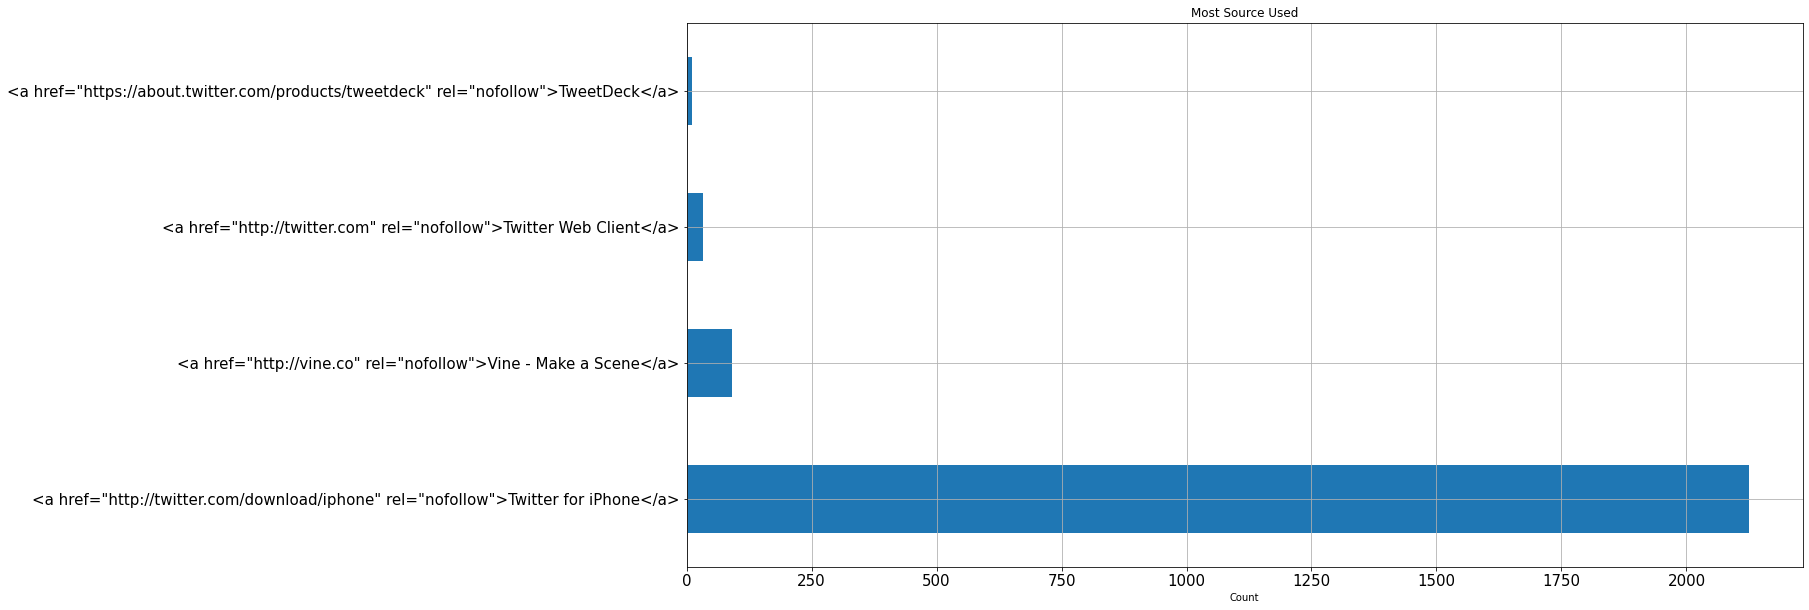

In [195]:
temp_df = tweeter_df['source'].value_counts()

temp_df.plot(kind='barh', figsize=(20,10),grid=True, fontsize =15,
             title = 'Most Source Used').set_xlabel('Count')
 
plt.show()

In [204]:
dog_class_count = tweeter_df['dog_class'].value_counts()
dog_class_count



pupper     252
doggo       80
puppo       29
floofer     10
Name: dog_class, dtype: int64

In [208]:
name_count = tweeter_df['name'].value_counts()
name_count

a           54
Charlie     12
Lucy        11
Cooper      11
Oliver      11
            ..
Rorie        1
Sundance     1
Edgar        1
Bauer        1
Ferg         1
Name: name, Length: 953, dtype: int64

In [213]:
tweeter_df.name.value_counts()


a           54
Charlie     12
Lucy        11
Cooper      11
Oliver      11
            ..
Rorie        1
Sundance     1
Edgar        1
Bauer        1
Ferg         1
Name: name, Length: 953, dtype: int64

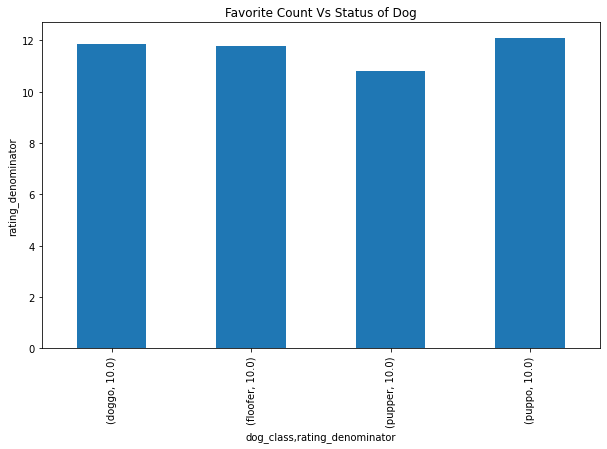

In [236]:
count = tweeter_df.groupby(['dog_class','rating_denominator']).rating_numerator.mean()
count.plot(kind='bar')
plt.ylabel('rating_denominator')
plt.title('Favorite Count Vs Status of Dog');

Text(0, 0.5, 'Rating')

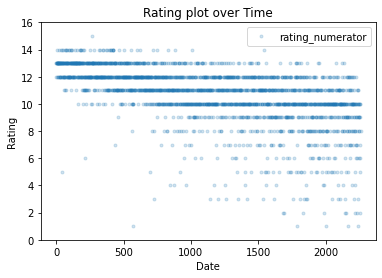

In [229]:

# Our range will be [0,16] taking of the two ouliers (1776 and 420)
tweeter_df.plot(y ='rating_numerator', ylim=[0,16], style = '.', alpha = .2)
plt.title('Rating plot over Time')
plt.xlabel('Date')
plt.ylabel('Rating')

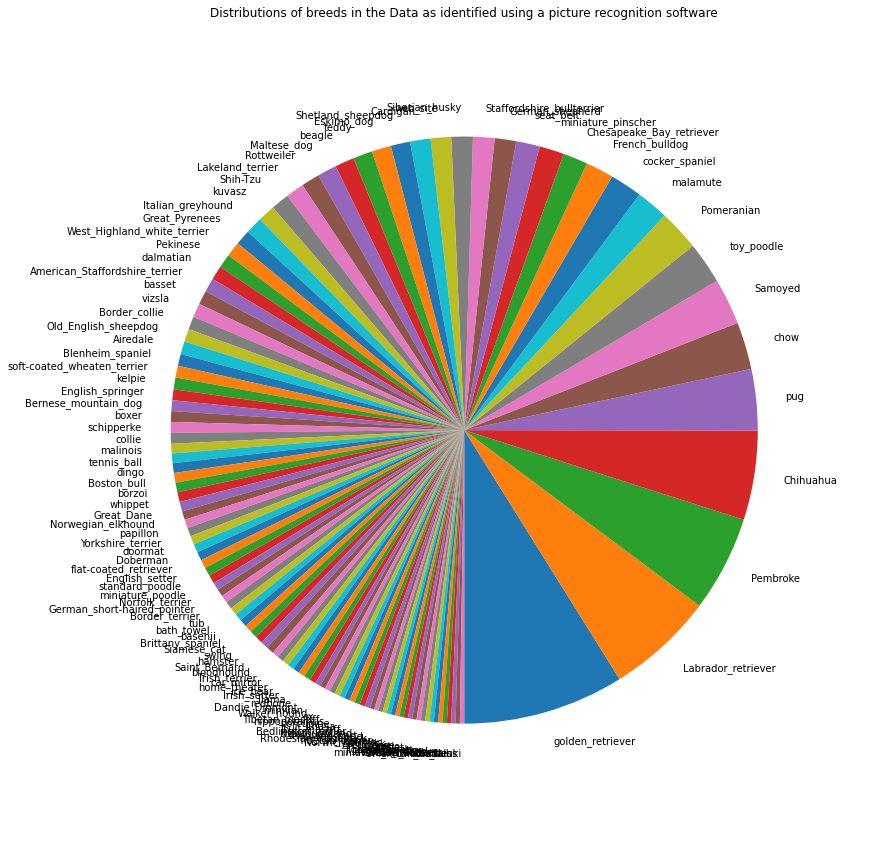

In [231]:
plt.rcParams['figure.figsize']=(15,15)

import matplotlib.pyplot as plt
tweeter_df.Breed_probability1.value_counts(sort=True).plot.pie(startangle=270, pctdistance=0.8, radius = 0.9)
plt.title('Distributions of breeds in the Data as identified using a picture recognition software')
plt.ylabel('')
plt.show();

Text(0.5, 0, 'DoggoLingo')

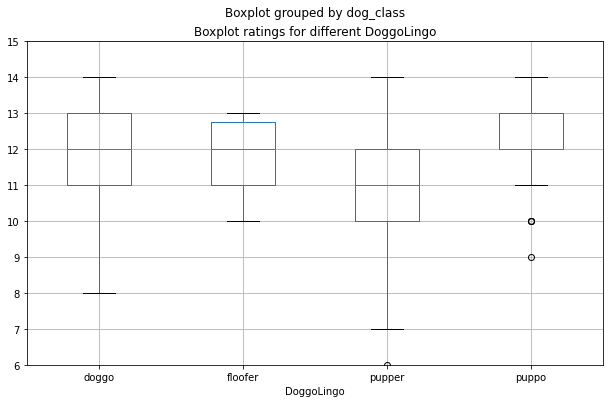

In [235]:
plt.rcParams['figure.figsize']=(10,6)
tweeter_df[pd.notnull(tweeter_df['dog_class'])].boxplot(column = ['rating_numerator'], by = ['dog_class'])
plt.ylim((6,15))
plt.title('Boxplot ratings for different DoggoLingo')
plt.xlabel('DoggoLingo')

- Conclusion

The Twitter account @dog_rates is focused on rating and commenting humorously on pictures of dogs, hence the likes, retweets and ratings do not completely depend on the picture of the dogs since the humor affects the followers decision as well.
We believe we did a great job at this project, form gathering data to assessing it and cleaning it and then analyzing it. There were some problems though, for example, the missing tweet_ids that we couldn't scrape their data from Twitter. Also, the dataset definitely needs further cleaning and assessment
